In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

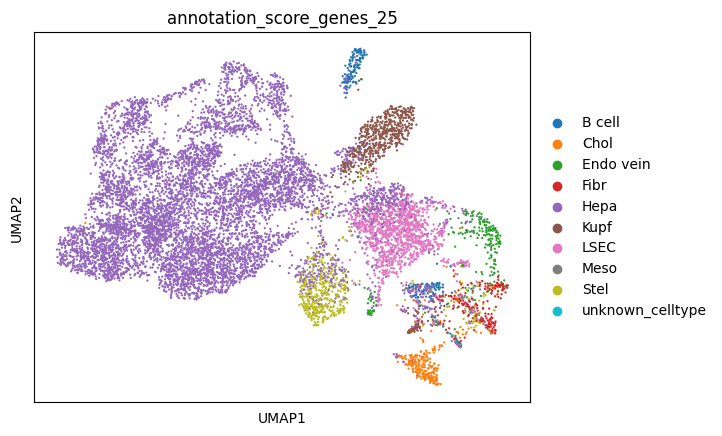

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
                  annotation_score_genes_25
B cell                             1.950481
Chol                               2.511578
Endo vein                          2.066263
Fibr                               2.030638
Hepa                              70.137157
Kupf                               5.860349
LSEC                              10.758817
Meso                               0.115782
Stel                               4.551122
unknown_celltype                   0.017813


In [4]:
# Original score_genes with basic marker gene list
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

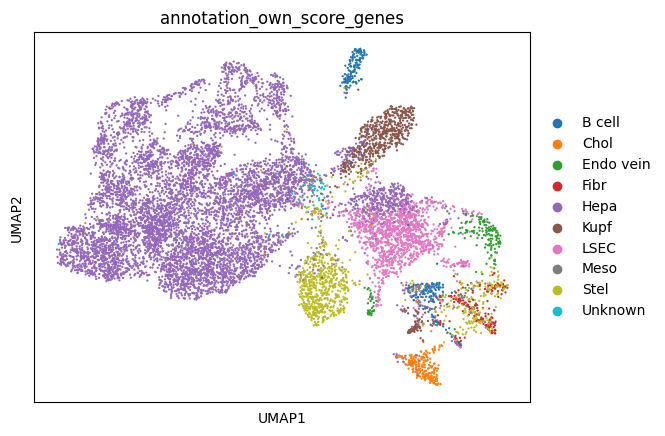

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.582829
Chol                         2.155326
Endo vein                    1.585322
Fibr                         1.505166
Hepa                        66.129320
Kupf                         5.931600
LSEC                        11.417884
Meso                         0.409690
Stel                         7.766299
Unknown                      0.516566


Hepa      LSEC  Endo vein      Chol      Kupf      Stel      Fibr  \
0      0.538750       NaN   0.021096  0.085765  0.021767       NaN  0.020318   
1           NaN  0.055902        NaN       NaN  0.376261       NaN  0.241621   
2           NaN       NaN        NaN       NaN  0.019384       NaN  0.274330   
3      0.199726       NaN        NaN  0.036456       NaN       NaN  0.154209   
4      0.234711       NaN        NaN  0.069145       NaN  0.056901  0.022204   
...         ...       ...        ...       ...       ...       ...       ...   
11223  0.313497       NaN        NaN  0.059235       NaN  0.061714  0.020161   
11224  0.511616       NaN        NaN  0.081015  0.051679  0.072720  0.028773   
11225  0.354052       NaN        NaN  0.058203  0.049886       NaN       NaN   
11226       NaN       NaN        NaN       NaN  0.063038  0.602880  0.242782   
11227  0.250237  0.194107   0.069639  0.058369  0.628397       NaN  0.021293   

       B cell      Meso  
0         NaN       NaN  
1         NaN  0.526007  
2         NaN  0.717227  
3         NaN  0.229382  
4         NaN       NaN  
...       ...       ...  
11223     NaN       NaN  
11224     NaN       NaN  
11225     NaN       NaN  
11226     NaN       NaN  
11227     NaN       NaN  

[11228 rows x 9 columns]

In [5]:
# Own score genes with basic marker gene list
scores = own_score_genes(sdata,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

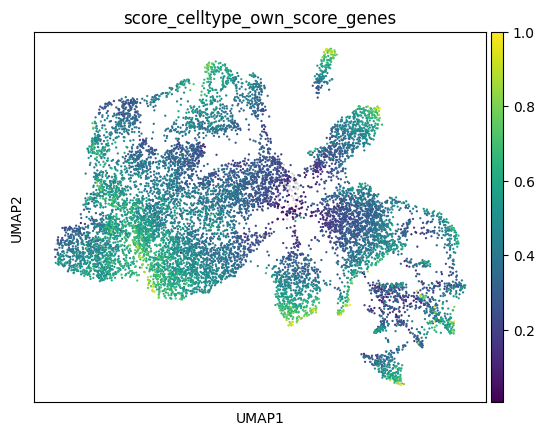

In [6]:
sc.pl.umap(sdata.table,color=['score_celltype_own_score_genes'])

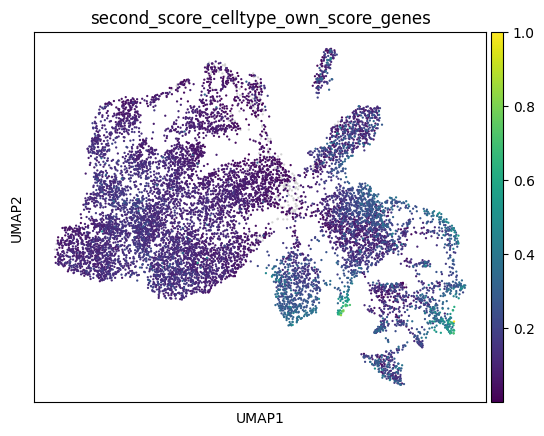

In [7]:
sc.pl.umap(sdata.table,color=['second_score_celltype_own_score_genes'])

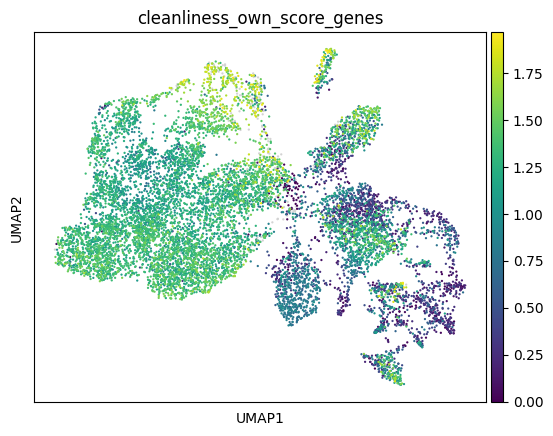

In [8]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes'])

Hepa         10
LSEC         11
Endo vein     9
Chol          7
Kupf         16
Stel         16
Fibr         21
B cell        4
Meso          5
dtype: int64


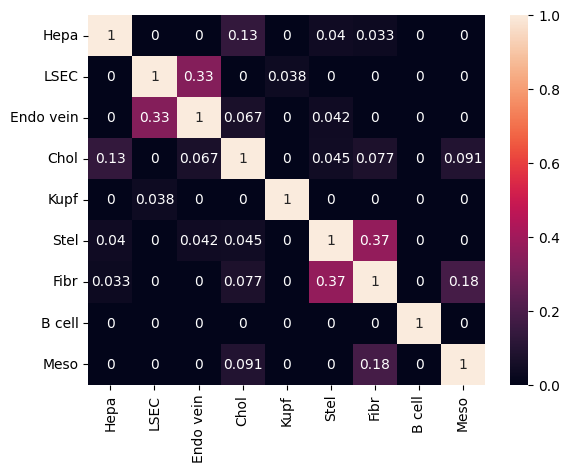

In [9]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
Jaccard_similarity_matrix(path_mg)

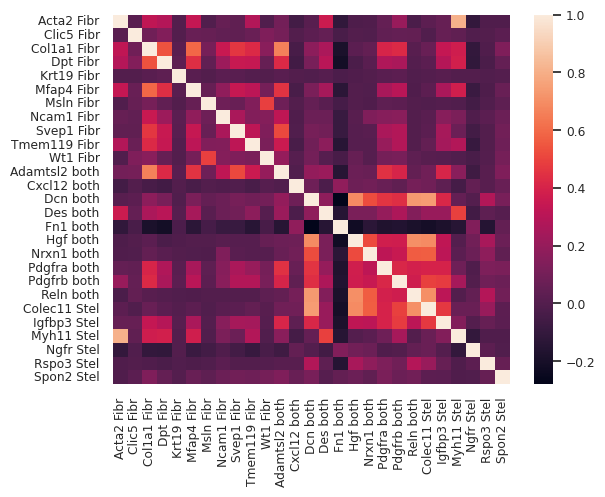

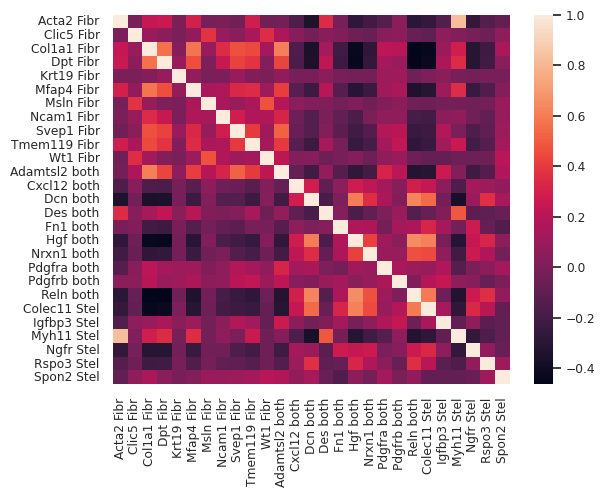

In [10]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between fibroblasts and stellate cells
# expression of all cells
sns.set(font_scale=0.8)
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'Fibr','Stel')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'Fibr') | (sdata.table.obs['annotation_own_score_genes'] == 'Stel'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'Fibr','Stel')

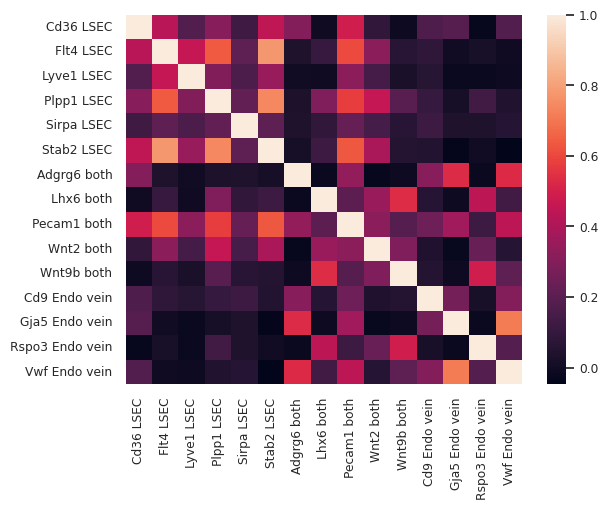

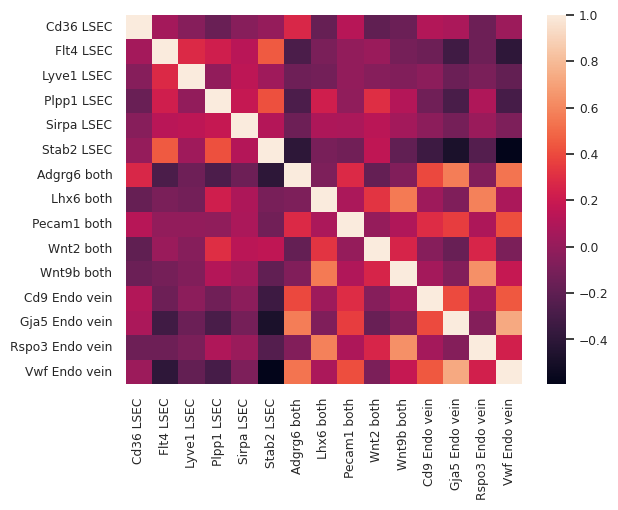

In [11]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between LSECs and Endo vein cells
# expression of all cells
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'LSEC','Endo vein')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'LSEC') | (sdata.table.obs['annotation_own_score_genes'] == 'Endo vein'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'LSEC','Endo vein')

<AxesSubplot: >

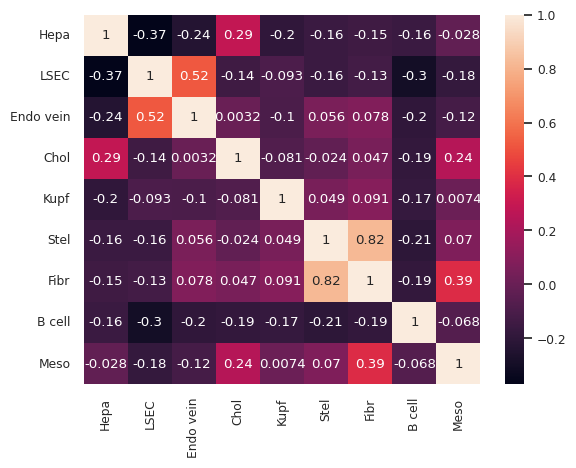

In [12]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

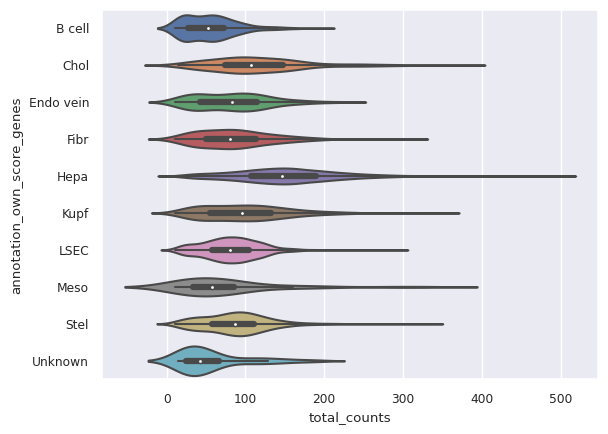

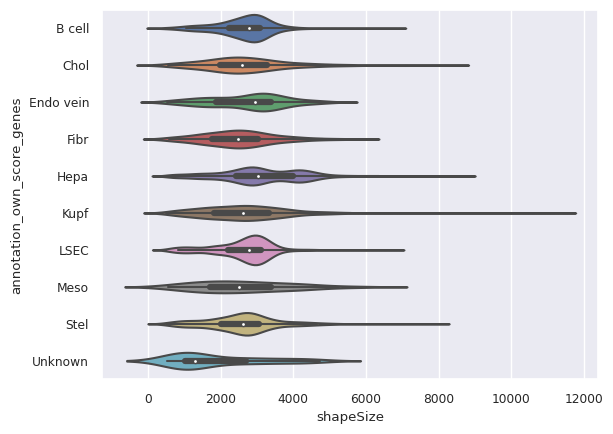

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

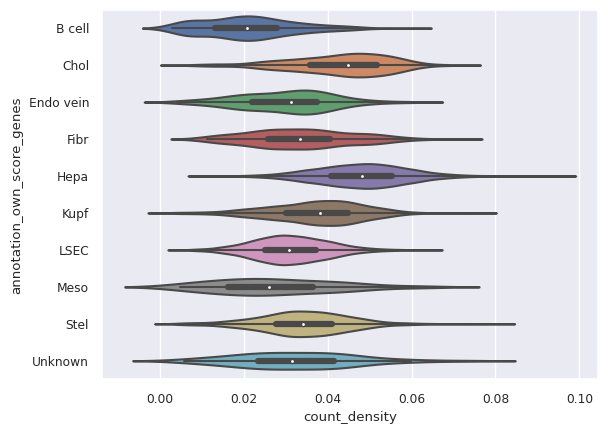

In [13]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

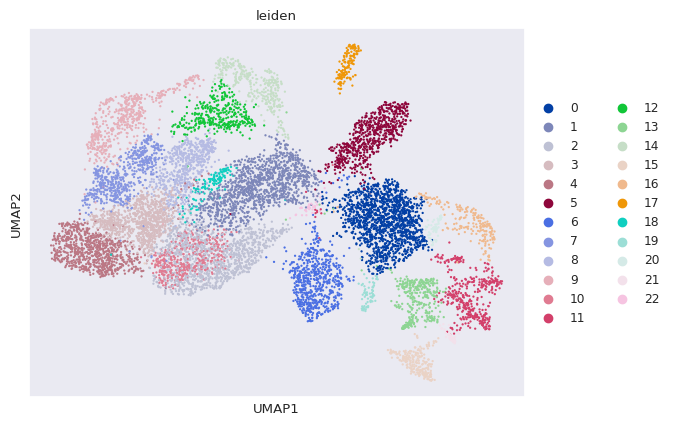

In [14]:
sc.tl.leiden(sdata.table,resolution=1,key_added='leiden')
sdata.table.obs
sc.pl.umap(sdata.table,color=['leiden'])

In [15]:
# count values of leiden, to see the max number of n_cells you can take per cluster (149 in this case)
print(sdata.table.obs['leiden'].value_counts())

0     1415
1     1203
2     1092
3      913
4      826
5      665
6      637
7      590
8      576
9      504
10     421
11     415
12     364
13     353
14     322
15     243
16     203
17     149
18     133
19      67
20      58
21      42
22      37
Name: leiden, dtype: int64


In [16]:
# STRATEGY 1 to change the marker gene list
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell']
leiden_clusters = [[1,2,3,4,7,8,9,10,12,14,18,20,21,22],[5],[0],[16,19],[11],[6],[13],[15],[17]]
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters,path_mg,10,149,1)

Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel'], ['Cxcl12', 'Stel'], ['Nrxn1', 'Stel'], ['Reln', 'Stel'], ['Hgf', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Adamtsl2', 'Fibr']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
LSEC
Maybe drop:[['Sirpa', 'Kupf'], ['Adgrg6', 'Endo vein']]
Meso
Maybe drop:[['Tmem119', 'Fibr']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Cxcl12', 'Stel'], ['Fn1', 'Stel'], ['Nrxn1', 'Stel'], ['Hgf', 'Stel'], ['Reln', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Adamtsl2', 'Fibr']]
LSEC
Maybe drop:[['Sirpa', 'Kupf'], ['Adgrg6', 'Endo vein']]
Meso
Maybe drop:[['Tmem119', 'Fibr']]
Summary:
Fibr
Maybe drop:[['Fn1', 'Hepa'], ['Fn1', 'Stel'], ['Cxcl12', 'Stel'], ['Nrxn1', 'Stel'], ['Reln', 'Stel'], ['Hgf', 'Stel'], ['Fn1', 'Chol']]
Stel
Maybe drop:[['Fn1', 'Hepa'], ['Adamtsl2', 'Fibr']]
Chol
Maybe drop:[['Fn1', 'Hepa']]
LSEC
Maybe drop:[['Lhx6', 'Endo vein'], ['Adgrg6', 'Endo vein']]
Meso
Maybe drop:[['Tmem119', 'Fibr']]
Summary:
F

In [17]:
results_strat1_10

{'Fibr': [('Fn1', 'Chol'),
  ('Fn1', 'Hepa'),
  ('Fn1', 'Stel'),
  ('Hgf', 'Stel'),
  ('Nrxn1', 'Stel'),
  ('Reln', 'Stel'),
  ('Cxcl12', 'Stel')],
 'Stel': [('Adamtsl2', 'Fibr'), ('Fn1', 'Hepa')],
 'Chol': [('Fn1', 'Hepa')],
 'LSEC': [('Adgrg6', 'Endo vein'), ('Sirpa', 'Kupf')],
 'Meso': [('Tmem119', 'Fibr')]}

In [18]:
sign_tuples = []
for key in results_strat1_10.keys():
    for t in results_strat1_10[key]:
        sign_tuples.append((key,t))
sign_tuples = [(x[0],x[1][0],x[1][1]) for x in sign_tuples]
sign_tuples

[('Fibr', 'Fn1', 'Chol'),
 ('Fibr', 'Fn1', 'Hepa'),
 ('Fibr', 'Fn1', 'Stel'),
 ('Fibr', 'Hgf', 'Stel'),
 ('Fibr', 'Nrxn1', 'Stel'),
 ('Fibr', 'Reln', 'Stel'),
 ('Fibr', 'Cxcl12', 'Stel'),
 ('Stel', 'Adamtsl2', 'Fibr'),
 ('Stel', 'Fn1', 'Hepa'),
 ('Chol', 'Fn1', 'Hepa'),
 ('LSEC', 'Adgrg6', 'Endo vein'),
 ('LSEC', 'Sirpa', 'Kupf'),
 ('Meso', 'Tmem119', 'Fibr')]

In [19]:
results_runs1_10[0]['Fibr']

[['Fn1', 'Hepa'],
 ['Fn1', 'Stel'],
 ['Cxcl12', 'Stel'],
 ['Nrxn1', 'Stel'],
 ['Reln', 'Stel'],
 ['Hgf', 'Stel'],
 ['Fn1', 'Chol'],
 ['Fn1', 'Hepa'],
 ['Cxcl12', 'Stel'],
 ['Fn1', 'Stel'],
 ['Nrxn1', 'Stel'],
 ['Hgf', 'Stel'],
 ['Reln', 'Stel'],
 ['Fn1', 'Chol'],
 ['Fn1', 'Hepa'],
 ['Fn1', 'Stel'],
 ['Cxcl12', 'Stel'],
 ['Nrxn1', 'Stel'],
 ['Reln', 'Stel'],
 ['Hgf', 'Stel'],
 ['Fn1', 'Chol'],
 ['Fn1', 'Hepa'],
 ['Cxcl12', 'Stel'],
 ['Fn1', 'Stel'],
 ['Nrxn1', 'Stel'],
 ['Hgf', 'Stel'],
 ['Reln', 'Stel'],
 ['Fn1', 'Chol'],
 ['Fn1', 'Hepa'],
 ['Cxcl12', 'Stel'],
 ['Fn1', 'Stel'],
 ['Nrxn1', 'Stel'],
 ['Hgf', 'Stel'],
 ['Reln', 'Stel'],
 ['Fn1', 'Chol'],
 ['Fn1', 'Hepa'],
 ['Cxcl12', 'Stel'],
 ['Fn1', 'Stel'],
 ['Nrxn1', 'Stel'],
 ['Hgf', 'Stel'],
 ['Reln', 'Stel'],
 ['Fn1', 'Chol'],
 ['Fn1', 'Hepa'],
 ['Cxcl12', 'Stel'],
 ['Fn1', 'Stel'],
 ['Nrxn1', 'Stel'],
 ['Reln', 'Stel'],
 ['Hgf', 'Stel'],
 ['Fn1', 'Chol'],
 ['Fn1', 'Hepa'],
 ['Cxcl12', 'Stel'],
 ['Fn1', 'Stel'],
 ['Nrxn1', 'Stel'],

In [20]:
DEG_details_runs1_10[0].keys()

dict_keys(['Hepa_Kupf', 'Hepa_LSEC', 'Hepa_Endo vein', 'Hepa_Fibr', 'Hepa_Stel', 'Hepa_Meso', 'Hepa_Chol', 'Hepa_B cell', 'Kupf_LSEC', 'Kupf_Endo vein', 'Kupf_Fibr', 'Kupf_Stel', 'Kupf_Meso', 'Kupf_Chol', 'Kupf_B cell', 'LSEC_Endo vein', 'LSEC_Fibr', 'LSEC_Stel', 'LSEC_Meso', 'LSEC_Chol', 'LSEC_B cell', 'Endo vein_Fibr', 'Endo vein_Stel', 'Endo vein_Meso', 'Endo vein_Chol', 'Endo vein_B cell', 'Fibr_Stel', 'Fibr_Meso', 'Fibr_Chol', 'Fibr_B cell', 'Stel_Meso', 'Stel_Chol', 'Stel_B cell', 'Meso_Chol', 'Meso_B cell', 'Chol_B cell'])

In [21]:
DEG_details_runs1_10[0]['Hepa_Chol']['overlap_markers']

['Fn1', 'Prox1']

In [36]:
DEGs_runs = {} 
DEGs_runs_sign = {}
n_ct = len(cell_types)
for r in range(10):
    dfs = []
    dfs_sign = []
    for i in range(n_ct):
        for j in range(i+1,n_ct):
            df = DEG_details_runs1_10[r][cell_types[i]+'_'+cell_types[j]]['DEGs']
            df['ct1'] = cell_types[i]
            df['ct2'] = cell_types[j]
            # only keep rows with value of gene in overlap_markers
            df = df[df['gene'].isin(DEG_details_runs1_10[r][cell_types[i]+'_'+cell_types[j]]['overlap_markers'])]
            dfs.append(df)                 
    DEGs_runs[r] = pd.concat(dfs)
    
    s = []
    s.append(DEGs_runs[r].merge(pd.DataFrame(sign_tuples, columns=['ct1','gene','ct2'])))
    s.append(DEGs_runs[r].merge(pd.DataFrame(sign_tuples, columns=['ct2','gene','ct1'])))
    DEGs_runs_sign[r] = pd.concat(s)

all_together = []
for r in range(10):
    all_together.append(DEGs_runs[r])
df_all_together = pd.concat(all_together)

all_together_sign = []
all_together_sign.append(df_all_together.merge(pd.DataFrame(sign_tuples, columns=['ct1','gene','ct2'])))
all_together_sign.append(df_all_together.merge(pd.DataFrame(sign_tuples, columns=['ct2','gene','ct1'])))
df_all_together_sign = pd.concat(all_together_sign)

logpadj_min_plot = df_all_together['pval_adj'].min()/10
logpadj_max_plot = 0.5
logf2_max_plot = df_all_together['logf2'].max() + 0.2
logf2_min_plot = df_all_together['logf2'].min() - 0.2

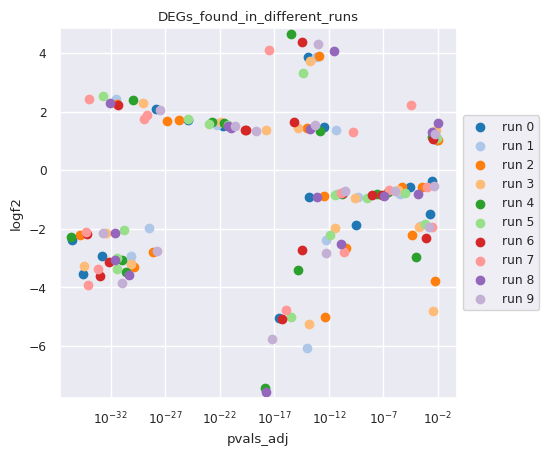

In [37]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
fig, ax = plt.subplots()
c = 0
for run in DEGs_runs.keys():
    ax.scatter(DEGs_runs[run]['pval_adj'].to_list(),DEGs_runs[run]['logf2'].to_list(), label='run '+str(run),c=colors[c])
    c = (c + 1)%40
ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
ax.set_ylim(logf2_min_plot,logf2_max_plot)
ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
ax.set_xscale('log')
ax.set_xlabel('pvals_adj')
ax.set_ylabel('logf2')
ax.set_title('DEGs_found_in_different_runs')
plt.show()

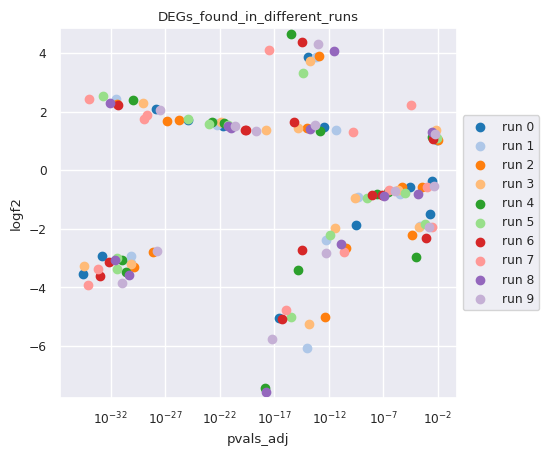

In [38]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
fig, ax = plt.subplots()
c = 0
for run in DEGs_runs_sign.keys():
    ax.scatter(DEGs_runs_sign[run]['pval_adj'].to_list(),DEGs_runs_sign[run]['logf2'].to_list(), label='run '+str(run),c=colors[c])
    c = (c + 1)%40
ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
ax.set_ylim(logf2_min_plot,logf2_max_plot)
ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
ax.set_xscale('log')
ax.set_xlabel('pvals_adj')
ax.set_ylabel('logf2')
ax.set_title('DEGs_found_in_different_runs')
plt.show()

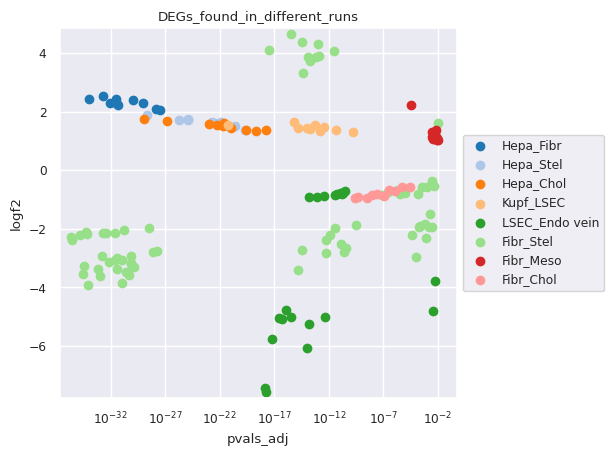

In [39]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
fig, ax = plt.subplots()
c = 0
for i in range(n_ct):
        for j in range(n_ct):
            df = df_all_together[df_all_together['ct1'] == cell_types[i]]
            df = df[df['ct2'] == cell_types[j]]
            if len(df) > 0:
                ax.scatter(df['pval_adj'].to_list(),df['logf2'].to_list(), label=cell_types[i]+'_'+cell_types[j],c=colors[c])
                c = (c + 1)%40
ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
ax.set_ylim(logf2_min_plot,logf2_max_plot)
ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
ax.set_xscale('log')
ax.set_xlabel('pvals_adj')
ax.set_ylabel('logf2')
ax.set_title('DEGs_found_in_different_runs')
plt.show()

In [35]:
df_all_together

gene      pval_adj     logf2   ct1        ct2
2       Fn1  1.517664e-28  2.075341  Hepa       Fibr
2       Fn1  1.291014e-25  1.705237  Hepa       Stel
1       Fn1  2.131310e-22  1.512983  Hepa       Chol
7     Sirpa  3.512681e-13  1.479637  Kupf       LSEC
94   Pecam1  1.561315e-14 -0.911189  LSEC  Endo vein
..      ...           ...       ...   ...        ...
95     Reln  1.580235e-28 -2.748186  Fibr       Stel
97      Hgf  9.946589e-32 -3.856776  Fibr       Stel
98      Dcn  1.842039e-33 -2.162421  Fibr       Stel
12  Tmem119  5.847381e-03  1.228435  Fibr       Meso
92      Fn1  1.155611e-06 -0.697740  Fibr       Chol

[152 rows x 5 columns]

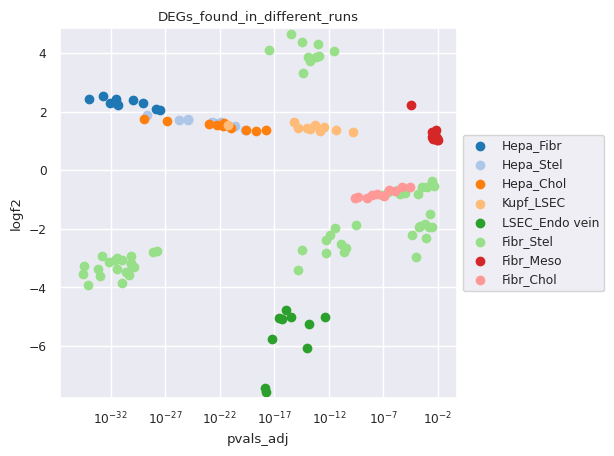

In [40]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
fig, ax = plt.subplots()
c = 0
for i in range(n_ct):
        for j in range(n_ct):
            df = df_all_together_sign[df_all_together_sign['ct1'] == cell_types[i]]
            df = df[df['ct2'] == cell_types[j]]
            if(len(df) > 0):
                ax.scatter(df['pval_adj'].to_list(),df['logf2'].to_list(), label=cell_types[i]+'_'+cell_types[j],c=colors[c])
                c = (c + 1)%40
ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
ax.set_ylim(logf2_min_plot,logf2_max_plot)
ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
ax.set_xscale('log')
ax.set_xlabel('pvals_adj')
ax.set_ylabel('logf2')
ax.set_title('DEGs_found_in_different_runs')
plt.show()

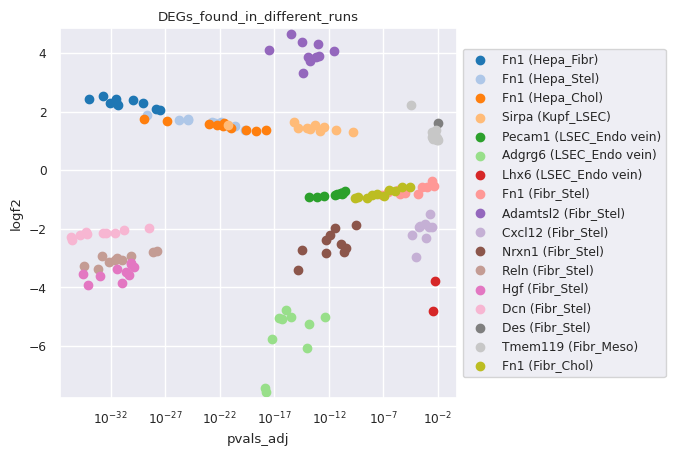

In [41]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
fig, ax = plt.subplots()
genes = df_all_together['gene'].unique()
c = 0
for i in range(n_ct):
        for j in range(i+1,n_ct):
            for g in genes:
                df = df_all_together[df_all_together['ct1'] == cell_types[i]]
                df = df[df['ct2'] == cell_types[j]]
                df = df[df['gene'] == g]
                if len(df) > 0:
                    ax.scatter(df['pval_adj'].to_list(),df['logf2'].to_list(), label=g + ' ('+cell_types[i]+'_'+cell_types[j]+')',c=colors[c])
                    c = (c + 1)%40
ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
ax.set_ylim(logf2_min_plot,logf2_max_plot)
ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
ax.set_xscale('log')
ax.set_xlabel('pvals_adj')
ax.set_ylabel('logf2')
ax.set_title('DEGs_found_in_different_runs')
plt.show()

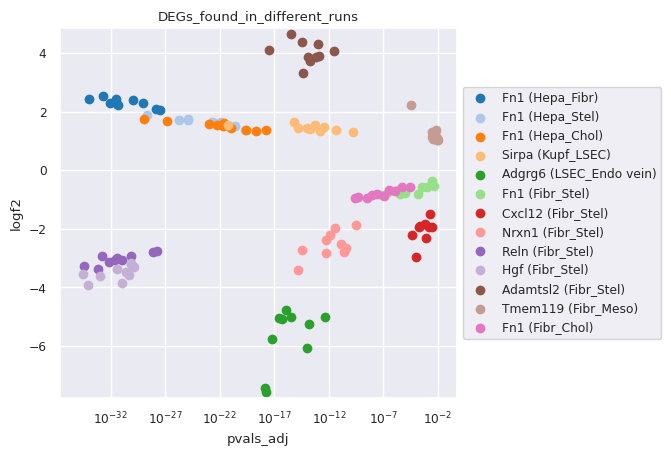

In [43]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
fig, ax = plt.subplots()
genes = df_all_together_sign['gene'].unique()
c = 0
for i in range(n_ct):
        for j in range(i+1,n_ct):
            for g in genes:
                df = df_all_together_sign[df_all_together_sign['ct1'] == cell_types[i]]
                df = df[df['ct2'] == cell_types[j]]
                df = df[df['gene'] == g]
                if len(df) > 0:
                    ax.scatter(df['pval_adj'].to_list(),df['logf2'].to_list(), label=g + ' ('+cell_types[i]+'_'+cell_types[j]+')',c=colors[c])
                    c = (c + 1)%40
ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
ax.set_ylim(logf2_min_plot,logf2_max_plot)
ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
ax.set_xscale('log')
ax.set_xlabel('pvals_adj')
ax.set_ylabel('logf2')
ax.set_title('DEGs_found_in_different_runs')
plt.show()

In [44]:
# Update marker gene list based on STRATEGY 1:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    df_mg.loc[results_strat1_10[key],key] = 0.5
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified1.csv")

KeyError: "None of [Index([   ('Fn1', 'Chol'),    ('Fn1', 'Hepa'),    ('Fn1', 'Stel'),\n          ('Hgf', 'Stel'),  ('Nrxn1', 'Stel'),   ('Reln', 'Stel'),\n       ('Cxcl12', 'Stel')],\n      dtype='object', name='Column1')] are in the [index]"

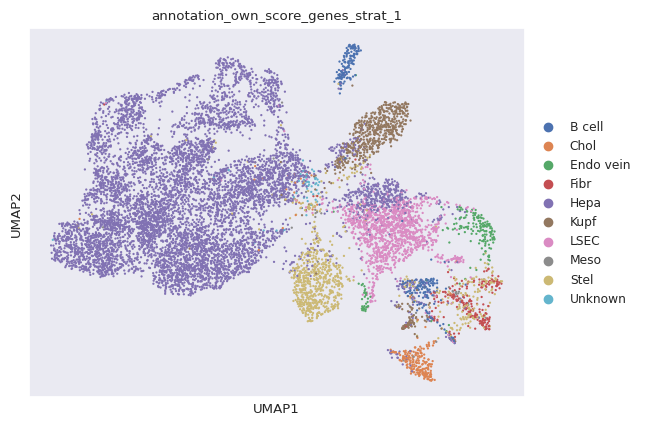

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1
B cell                               2.609548
Chol                                 2.146420
Endo vein                            1.683292
Fibr                                 1.879230
Hepa                                66.378696
Kupf                                 5.993944
LSEC                                11.017100
Meso                                 0.356252
Stel                                 7.472390
Unknown                              0.463128


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 1
path_mg_mod1 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified1.csv"
scores = own_score_genes(sdata,path_mg_mod1,suffix='_strat_1')
visualize_classification(sdata,'annotation_own_score_genes_strat_1','umap_23_15',path_mg_mod1,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

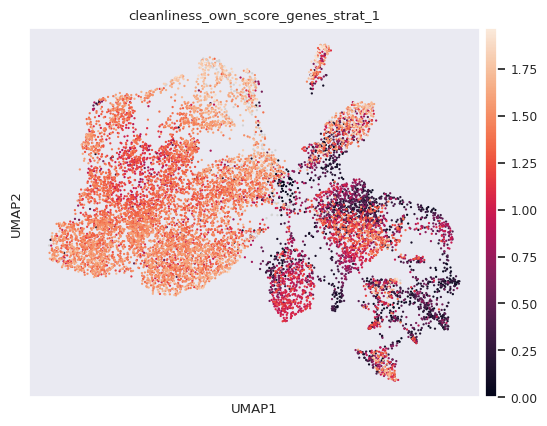

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1'])

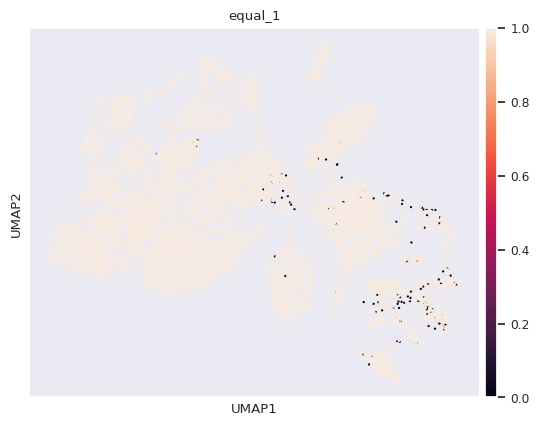

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1'])

Hepa         10.0
LSEC         10.0
Endo vein     9.0
Chol          6.5
Kupf         16.0
Stel         15.0
Fibr         18.5
B cell        4.0
Meso          4.5
dtype: float64


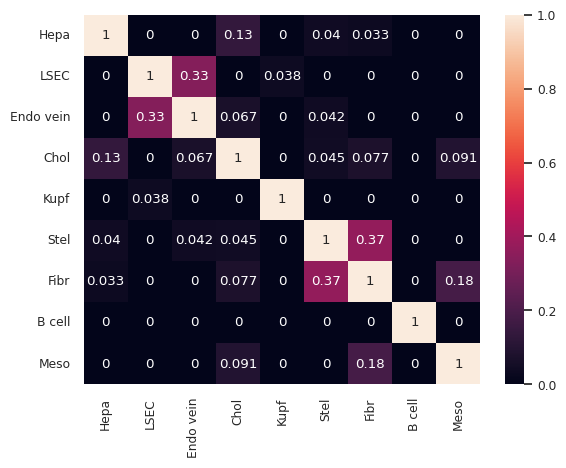

In [ ]:
Jaccard_similarity_matrix(path_mg_mod1)

Adgre1
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Meso']
Axl
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Fibr', 'Meso']
Ccr2
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Cd36
Is marker gene of: ['LSEC']
Could also be a marker gene of: ['Endo vein']
Cd3e
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Clec10a
Is marker gene of: []
Could also be a marker gene of: ['Meso']
Clec9a
Is marker gene of: []
Could also be a marker gene of: ['Kupf']
Cx3cr1
Is marker gene of: []
Could also be a marker gene of: ['Meso', 'Chol']
Cyp2e1
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['Kupf', 'LSEC', 'Stel']
Dpt
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Chol']
Flt4
Is marker gene of: ['LSEC']
Could also be a marker gene of: ['Endo vein']
Gdf15
Is marker gene of: []
Could also be a marker gene of: ['LSEC']
Ghr
Is marker gene of: ['Hepa']
Could also be a marker gene of: ['LSEC', 'Stel']
Glul
Is marker 

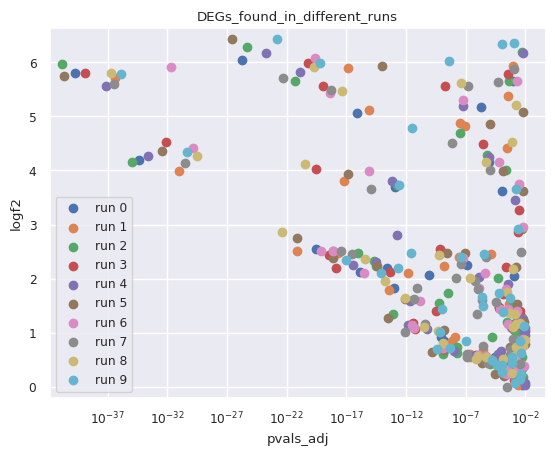

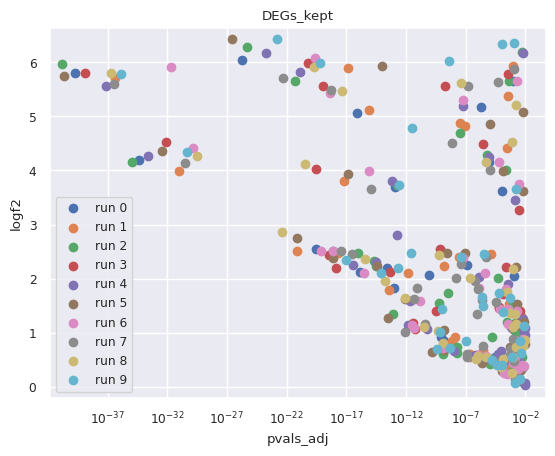

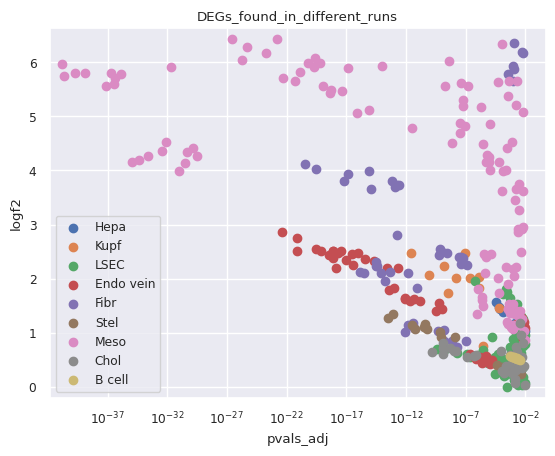

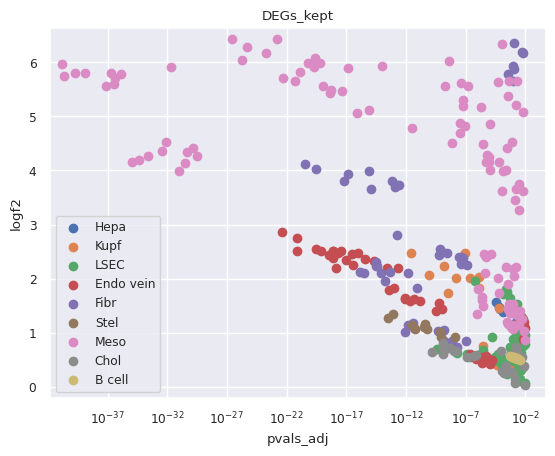

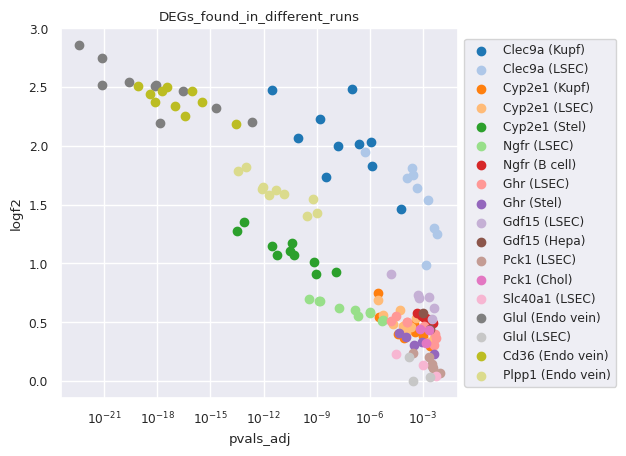

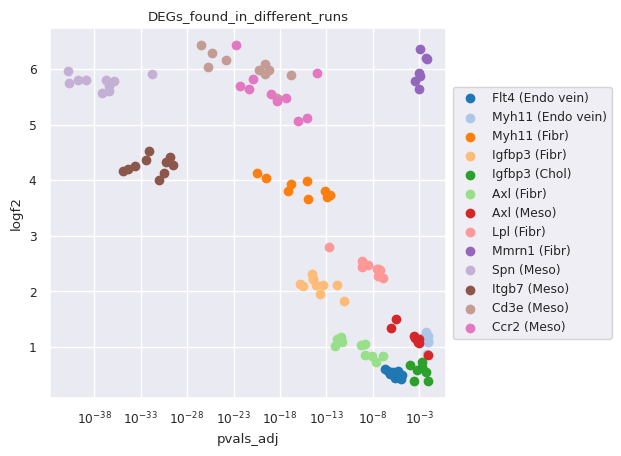

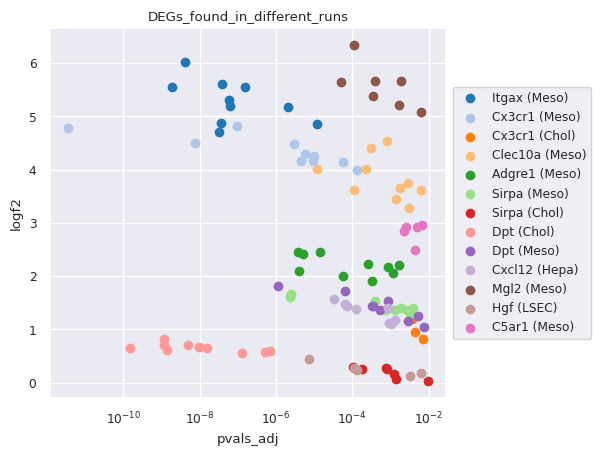

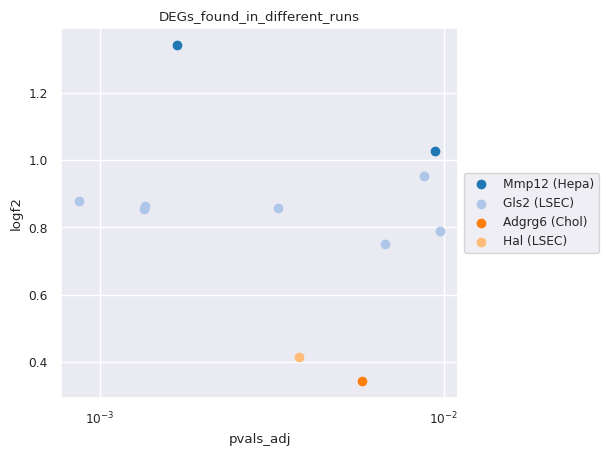

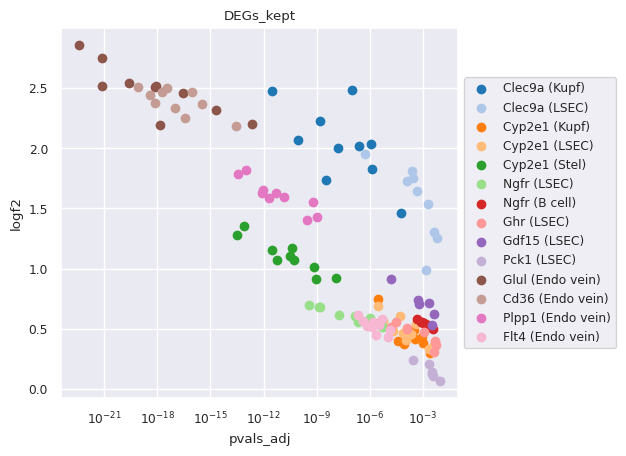

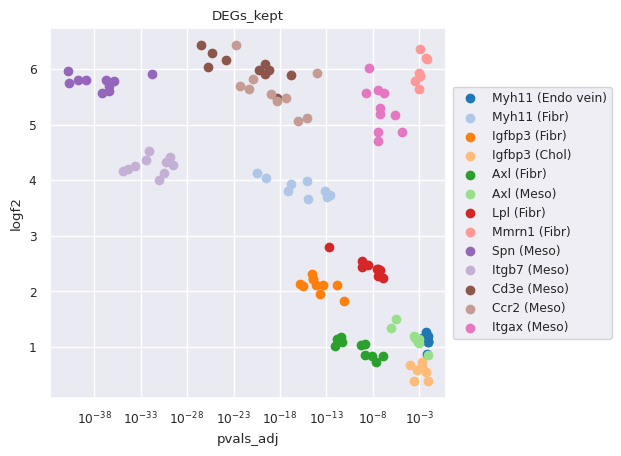

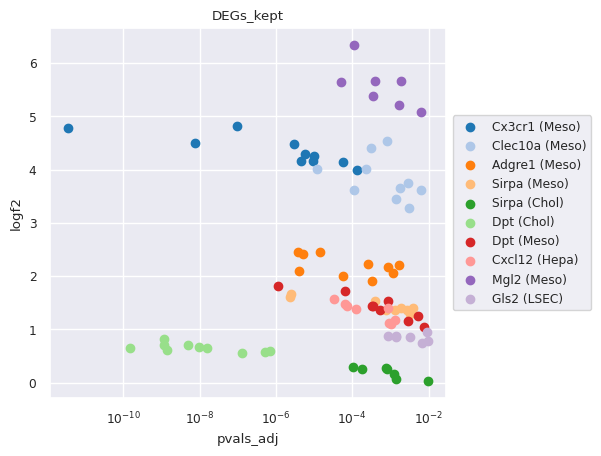

In [45]:
# STRATEGY 2 to change the marker gene list
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell']
leiden_clusters = [[1,2,3,4,7,8,9,10,12,14,18,20,21,22],[5],[0],[16,19],[11],[6],[13],[15],[17]]
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters,path_mg,10,149,2)

In [47]:
results_strat2_10
# put all values of the dictionary in one list
sign_tuples = []
for key in results_strat2_10.keys():
    for g in results_strat2_10[key]:
        sign_tuples.append((g,key))
sign_tuples

[('Adgre1', 'Meso'),
 ('Ccr2', 'Meso'),
 ('Cd3e', 'Meso'),
 ('Clec10a', 'Meso'),
 ('Cx3cr1', 'Meso'),
 ('Itgax', 'Meso'),
 ('Itgb7', 'Meso'),
 ('Spn', 'Meso'),
 ('Axl', 'Meso'),
 ('Dpt', 'Meso'),
 ('Sirpa', 'Meso'),
 ('Mgl2', 'Meso'),
 ('Axl', 'Fibr'),
 ('Igfbp3', 'Fibr'),
 ('Lpl', 'Fibr'),
 ('Myh11', 'Fibr'),
 ('Mmrn1', 'Fibr'),
 ('Cd36', 'Endo vein'),
 ('Flt4', 'Endo vein'),
 ('Glul', 'Endo vein'),
 ('Plpp1', 'Endo vein'),
 ('Myh11', 'Endo vein'),
 ('Clec9a', 'Kupf'),
 ('Cyp2e1', 'Kupf'),
 ('Dpt', 'Chol'),
 ('Igfbp3', 'Chol'),
 ('Sirpa', 'Chol'),
 ('Cyp2e1', 'LSEC'),
 ('Ngfr', 'LSEC'),
 ('Clec9a', 'LSEC'),
 ('Ghr', 'LSEC'),
 ('Gls2', 'LSEC'),
 ('Gdf15', 'LSEC'),
 ('Pck1', 'LSEC'),
 ('Cyp2e1', 'Stel'),
 ('Ngfr', 'B cell'),
 ('Cxcl12', 'Hepa')]

In [49]:
DEGs_runs_all_cell_types_together = {}
for i in range(10):
    dfs = []
    for ct in cell_types:
        df = DEG_details_runs2_10[i]['pos_DEGs_but_not_marker'][ct]
        # add column to df with cell type
        df['cell_type'] = ct
        dfs.append(df)
    # concatenate all dataframes in dfs
    DEGs_runs_all_cell_types_together[i] = pd.concat(dfs)
all_together = []
for i in range(10):
    all_together.append(DEGs_runs_all_cell_types_together[i])
df_all_together = pd.concat(all_together)
df_all_together 
df_all_together_sign = df_all_together.merge(pd.DataFrame(sign_tuples, columns=['gene','cell_type']))        
# get all unique vaues in column 'gene' of df_all_together
genes_all = df_all_together['gene'].unique()
genes_all_sign = df_all_together_sign['gene'].unique()
print(len(df_all_together))
print(len(df_all_together_sign))
print(len(genes_all))
print(len(genes_all_sign))
# get min value in column 'p_val_adj' of df_all_together
logpadj_min_plot = df_all_together['pvals_adj'].min()/10
logpadj_max_plot = 0.5
logf2_max_plot = df_all_together['logf2'].max() + 0.2
logf2_min_plot = -0.2


368
335
34
28


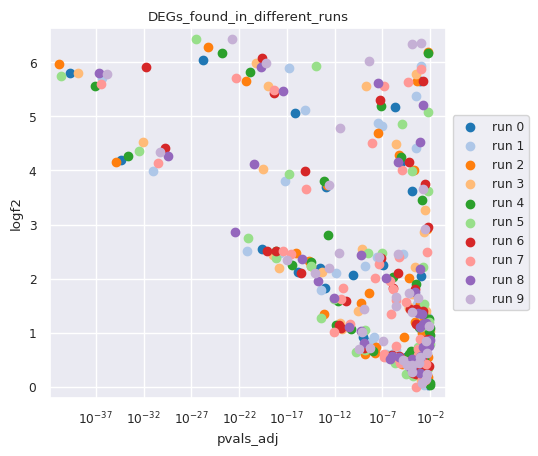

In [50]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
fig, ax = plt.subplots()
c = 0
for run in DEGs_runs_all_cell_types_together:
    ax.scatter(DEGs_runs_all_cell_types_together[run]['pvals_adj'].to_list(),DEGs_runs_all_cell_types_together[run]['logf2'].to_list(), label='run '+str(run),c=colors[c])
    c = (c + 1)%40
ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
ax.set_ylim(logf2_min_plot,logf2_max_plot)
ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
ax.set_xscale('log')
ax.set_xlabel('pvals_adj')
ax.set_ylabel('logf2')
ax.set_title('DEGs_found_in_different_runs')
plt.show()

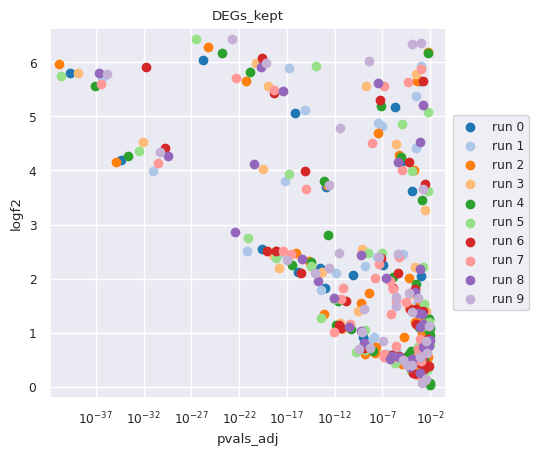

In [51]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
fig, ax = plt.subplots()
c = 0
for run in range(10):
    df = DEGs_runs_all_cell_types_together[run].merge(pd.DataFrame(sign_tuples, columns=['gene','cell_type']))        
    ax.scatter(df['pvals_adj'].to_list(),df['logf2'].to_list(), label='run '+str(run),c=colors[c])
    c = (c + 1)%40
ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
ax.set_ylim(logf2_min_plot,logf2_max_plot)
ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
ax.set_xscale('log')
ax.set_xlabel('pvals_adj')
ax.set_ylabel('logf2')
ax.set_title('DEGs_kept')
plt.show()

12
19
68
47
47
15
119
31
10


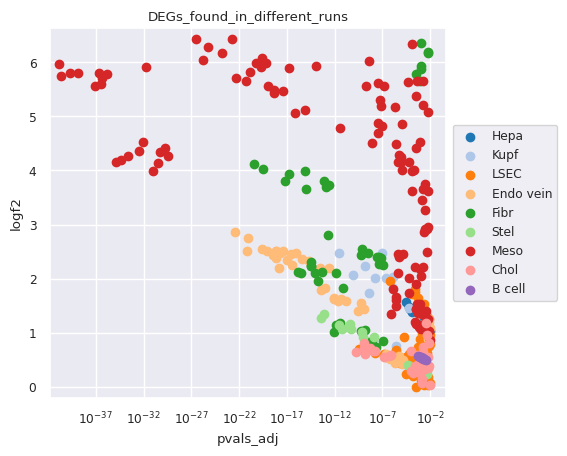

In [52]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
fig, ax = plt.subplots()
c = 0
for ct in cell_types:
    # select only the rows of the cell type
    df = df_all_together[df_all_together['cell_type'] == ct]
    print(len(df))
    ax.scatter(df['pvals_adj'].to_list(),df['logf2'].to_list(), label=str(ct),c=colors[c])
    c = (c + 1)%40
ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
ax.set_ylim(logf2_min_plot,logf2_max_plot)
ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
ax.set_xscale('log')
ax.set_xlabel('pvals_adj')
ax.set_ylabel('logf2')
ax.set_title('DEGs_found_in_different_runs')
plt.show()

8
16
69
47
47
19
119
25
10


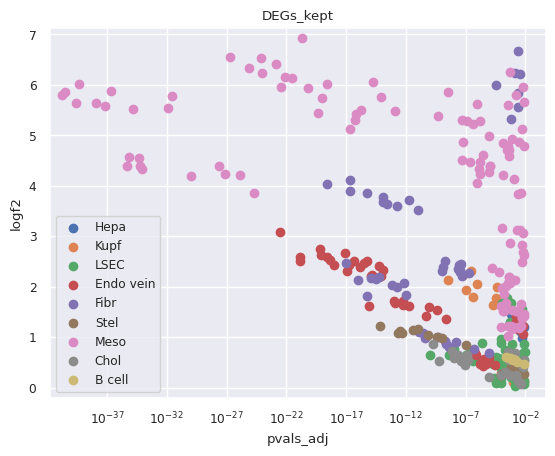

In [ ]:
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
fig, ax = plt.subplots()
c = 0
for ct in cell_types:
    # select only the rows of the cell type
    df = df_all_together_sign[df_all_together_sign['cell_type'] == ct]
    print(len(df))
    ax.scatter(df['pvals_adj'].to_list(),df['logf2'].to_list(), label=ct,c=colors[c])
    c = (c + 1)%40
ax.legend()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
ax.set_ylim(logf2_min_plot,logf2_max_plot)
ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
ax.set_xscale('log')
ax.set_xlabel('pvals_adj')
ax.set_ylabel('logf2')
ax.set_title('DEGs_kept')
plt.show()

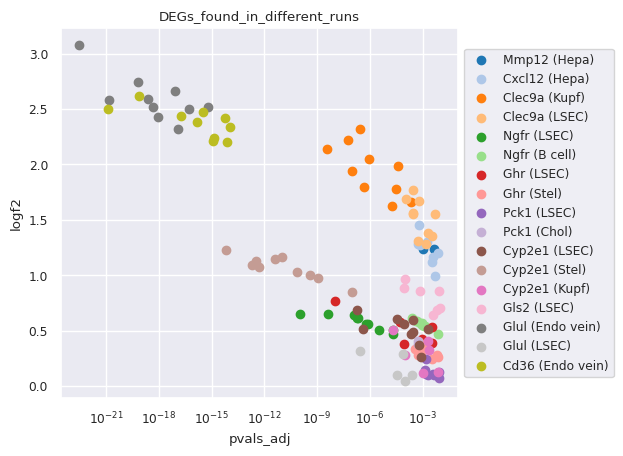

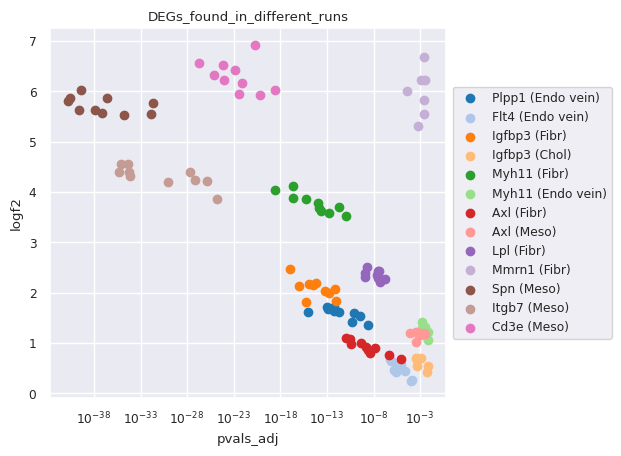

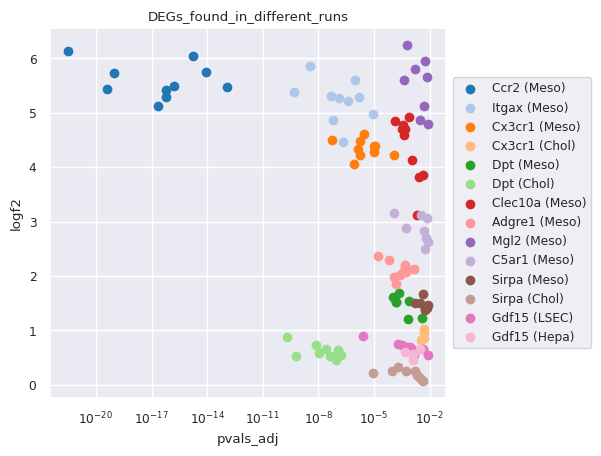

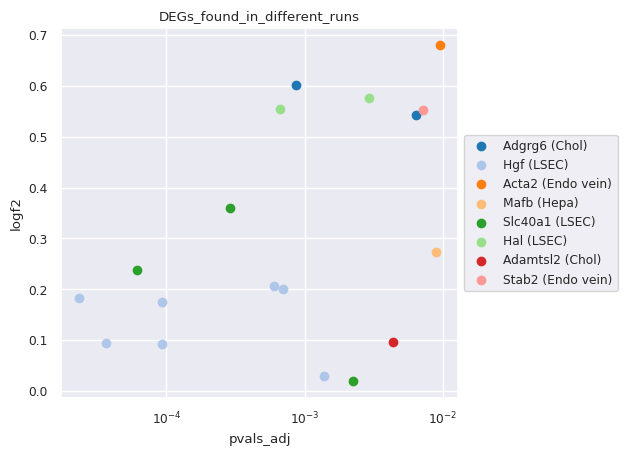

In [ ]:
import matplotlib
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
genes_all_sets = []
for i in range(0,len(genes_all),10):
    genes_all_sets.append(genes_all[i:i+10])
c = 0
for genes in genes_all_sets:
    c = 0
    fig, ax = plt.subplots()
    for gene in genes:
        # select only the rows of the cell type
        df = df_all_together[df_all_together['gene'] == gene]
        # get unique cell_types in df
        cell_types = df['cell_type'].unique()
        for ct in cell_types:
            df_ct = df[df['cell_type'] == ct]
            ax.scatter(df_ct['pvals_adj'].to_list(),df_ct['logf2'].to_list(), label=gene + ' ('+ct+')',c=colors[c],c=colors[c])
            c += 1
            c = (c + 1)%40
            
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    ax.set_xscale('log')
    ax.set_xlabel('pvals_adj')
    ax.set_ylabel('logf2')
    ax.set_title('DEGs_found_in_different_runs')
    plt.show()


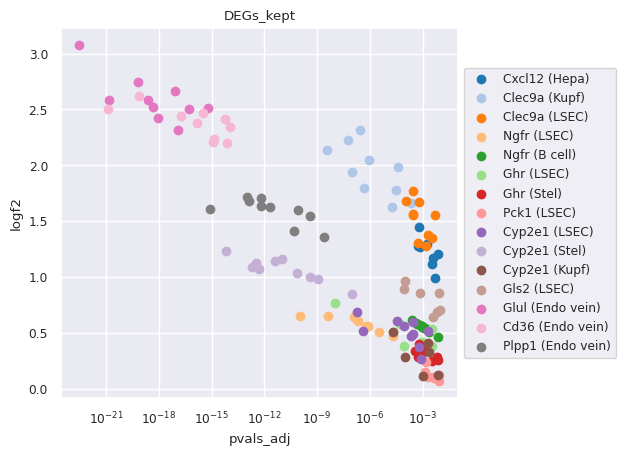

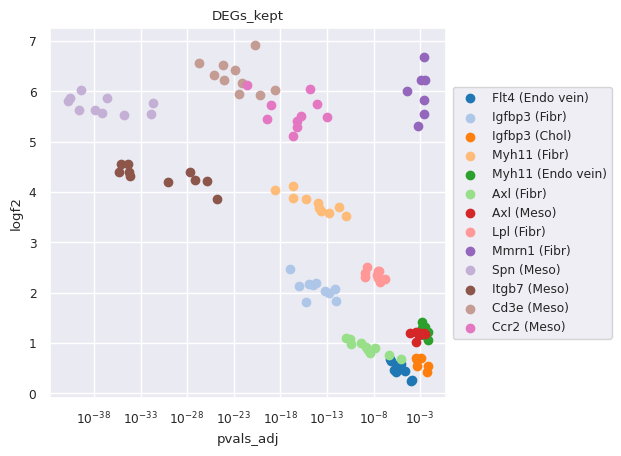

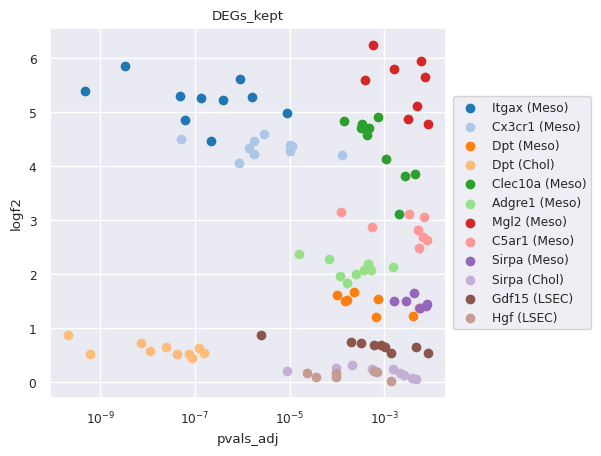

In [ ]:
import matplotlib
colors = []
for c in plt.cm.tab20.colors: colors.append(matplotlib.colors.to_hex(c))
for c in plt.cm.tab20b.colors: colors.append(matplotlib.colors.to_hex(c))
genes_all_sets = []
for i in range(0,len(genes_all_sign),10):
    genes_all_sets.append(genes_all_sign[i:i+10])
c = 0
for genes in genes_all_sets:
    c = 0
    fig, ax = plt.subplots()
    for gene in genes:
        # select only the rows of the cell type
        df = df_all_together_sign[df_all_together_sign['gene'] == gene]
        # get unique cell_types in df
        cell_types = df['cell_type'].unique()
        for ct in cell_types:
            df_ct = df[df['cell_type'] == ct]
            ax.scatter(df_ct['pvals_adj'].to_list(),df_ct['logf2'].to_list(), label=gene + ' ('+ct+')',c=colors[c],c=colors[c])
            c = (c + 1)%40

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
    ax.set_xscale('log')
    ax.set_xlabel('pvals_adj')
    ax.set_ylabel('logf2')
    ax.set_title('DEGs_kept')
    plt.show()


In [ ]:
genes_all_sign_sets = []
for i in range(0,len(genes_all_sign),10):
    genes_all_sign_sets.append(genes_all_sign[i:i+10])
c = 0
for genes in genes_all_sign_sets:
    fig, ax = plt.subplots()
    for gene in genes:
        # select only the rows of the cell type
        df = df_all_together_sign[df_all_together_sign['gene'] == gene]
        ax.scatter(df['pvals_adj'].to_list(),df['logf2'].to_list(), label=gene,c=colors[i])
        c = (c + 1)%40
    ax.legend(ncol=2)
    # more different colors necessary
    colors = np.random.rand(30)
    ax.set_ylim(logf2_min_plot,logf2_max_plot)
    ax.set_xlim(logpadj_min_plot,logpadj_max_plot)
    ax.set_xscale('log')
    ax.set_xlabel('pvals_adj')
    ax.set_ylabel('logf2')
    ax.set_title('DEGs_found_in_different_runs')
    plt.show()

In [ ]:
results_strat2_10

{'Meso': ['Adgre1',
  'Ccr2',
  'Cd3e',
  'Clec10a',
  'Cx3cr1',
  'Itgax',
  'Itgb7',
  'Spn',
  'Axl',
  'Dpt',
  'Mgl2',
  'C5ar1',
  'Sirpa'],
 'Fibr': ['Axl', 'Igfbp3', 'Lpl', 'Mmrn1', 'Myh11'],
 'Endo vein': ['Cd36', 'Flt4', 'Glul', 'Plpp1'],
 'Kupf': ['Clec9a', 'Cyp2e1'],
 'LSEC': ['Clec9a', 'Cyp2e1', 'Ngfr', 'Ghr', 'Hgf', 'Gdf15'],
 'Hepa': ['Cxcl12'],
 'Stel': ['Cyp2e1'],
 'Chol': ['Dpt', 'Sirpa'],
 'B cell': ['Ngfr']}

In [ ]:
# Update marker gene list based on STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 0.5
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified2.csv")

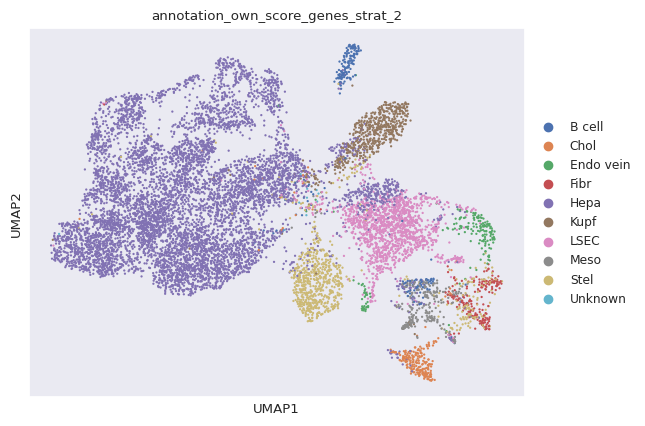

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_2
B cell                               2.039544
Chol                                 2.164232
Endo vein                            1.647667
Fibr                                 1.745636
Hepa                                65.016031
Kupf                                 5.334877
LSEC                                12.566797
Meso                                 2.511578
Stel                                 6.875668
Unknown                              0.097969


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 2
path_mg_mod2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified2.csv"
scores = own_score_genes(sdata,path_mg_mod2,suffix='_strat_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_2','umap_23_15',path_mg_mod2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

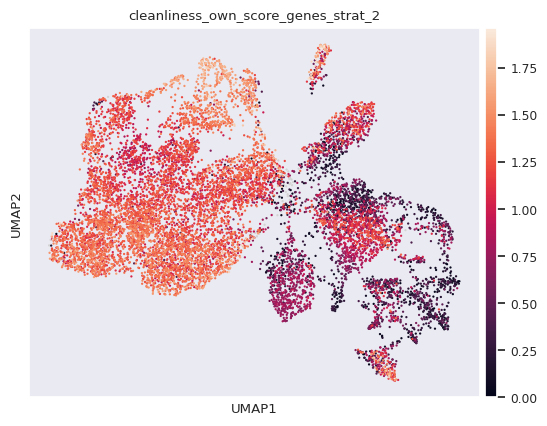

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_2'])
# makes sense that this becomes worse, because more marker genes overlap between cell types
# but does not mean that the annotation is worse

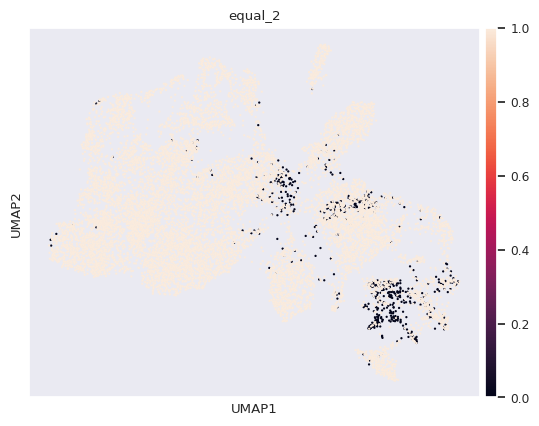

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_2'])

Hepa         10.5
LSEC         14.0
Endo vein    11.0
Chol          8.0
Kupf         17.0
Stel         16.5
Fibr         23.5
B cell        4.5
Meso         11.5
dtype: float64


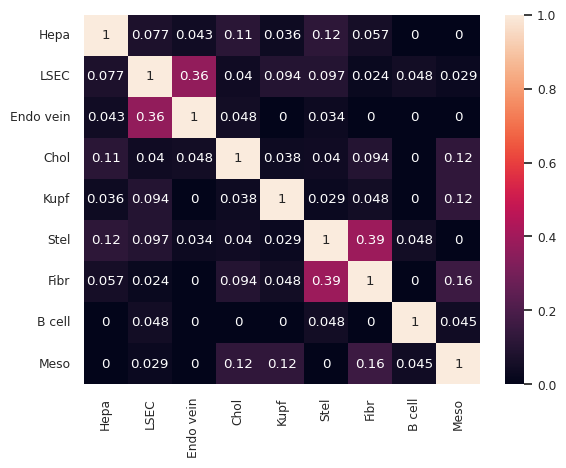

In [ ]:
Jaccard_similarity_matrix(path_mg_mod2)

In [ ]:
# STRATEGY 1 and STRATEGY 2 combined to change the marker gene list

In [ ]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    df_mg.loc[results_strat1_10[key],key] = 0.5
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 0.5
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified_1_2.csv")

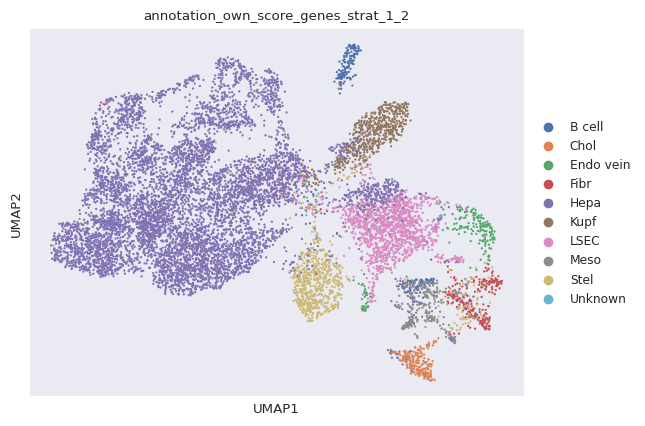

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1_2
B cell                                 1.968294
Chol                                   2.137513
Endo vein                              1.790167
Fibr                                   2.101888
Hepa                                  65.194157
Kupf                                   5.317064
LSEC                                  12.174920
Meso                                   2.707517
Stel                                   6.519416
Unknown                                0.089063


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 1 and STRATEGY 2
path_mg_mod_1_2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_modified_1_2.csv"
scores = own_score_genes(sdata,path_mg_mod_1_2,suffix='_strat_1_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_1_2','umap_23_15',path_mg_mod_1_2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

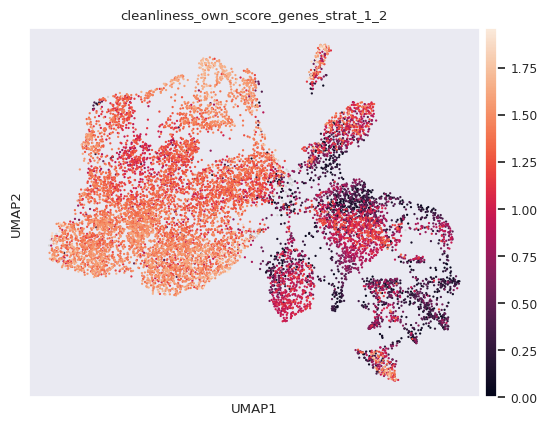

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1_2'])

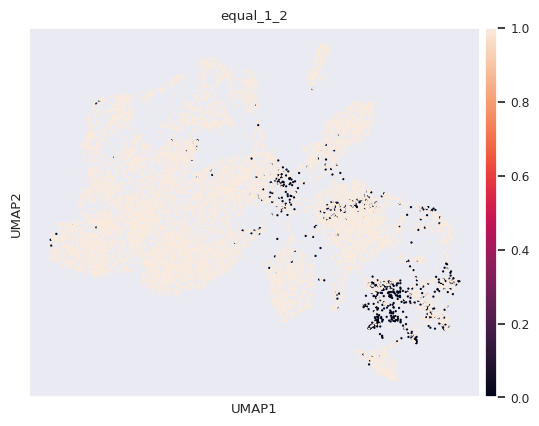

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

Hepa         10.5
LSEC         13.0
Endo vein    11.0
Chol          7.5
Kupf         17.0
Stel         15.5
Fibr         21.0
B cell        4.5
Meso         11.0
dtype: float64


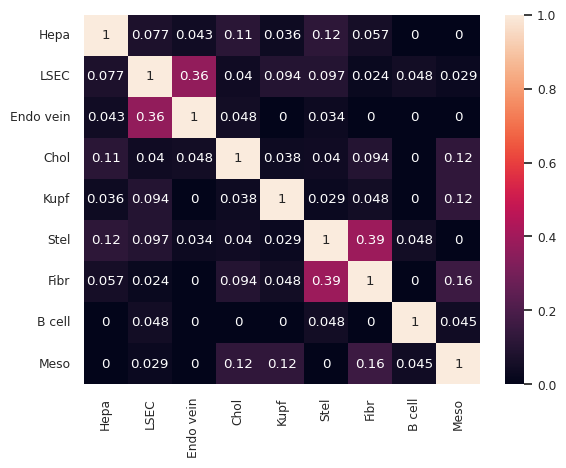

In [ ]:
Jaccard_similarity_matrix(path_mg_mod_1_2)

In [ ]:
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell']
leiden_clusters = [[1,2,3,4,7,8,9,10,12,14,18,20,21,22],[5],[0],[16,19],[11],[6],[13],[15],[17]]
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a

In [ ]:
interesting_genes_drop = []
interesting_genes_add = []
for keys in results_strat1_10.keys():
    for g in results_strat1_10[keys]:
        if g not in interesting_genes_drop:
            interesting_genes_drop.append(g)
for keys in results_strat2_10.keys():
    for g in results_strat2_10[keys]:
        if g not in interesting_genes_add:
            interesting_genes_add.append(g)


In [ ]:
adata_sub = sdata.table[sdata.table.obs['equal_1_2'] == False,:]
interesting_cells = adata_sub.obs_names.to_list()
len(interesting_cells)

639

In [ ]:
sdata.table.obs

region  instance  n_genes_by_counts  log1p_n_genes_by_counts  \
cells                                                                
64         1         1                 12                 2.564949   
66         1         1                 16                 2.833213   
67         1         1                 15                 2.772589   
68         1         1                  8                 2.197225   
69         1         1                  6                 1.945910   
...      ...       ...                ...                      ...   
28929      1         1                  8                 2.197225   
28944      1         1                 11                 2.484907   
28992      1         1                 10                 2.397895   
29115      1         1                 16                 2.833213   
29130      1         1                 29                 3.401197   

       total_counts  log1p_total_counts  pct_counts_in_top_2_genes  \
cells                                                                
64              150            5.017280                  74.666667   
66               38            3.663562                  36.842105   
67               50            3.931826                  52.000000   
68               84            4.442651                  80.952381   
69               52            3.970292                  67.307692   
...             ...                 ...                        ...   
28929           108            4.691348                  87.037037   
28944           155            5.049856                  71.612903   
28992           132            4.890349                  71.969697   
29115            98            4.595120                  55.102041   
29130           168            5.129899                  36.309524   

       pct_counts_in_top_5_genes  n_counts  shapeSize  ...  \
cells                                                  ...   
64                     92.000000       150     2545.0  ...   
66                     68.421053        38     1257.0  ...   
67                     76.000000        50     3057.0  ...   
68                     95.238095        84     2071.0  ...   
69                     98.076923        52     1637.0  ...   
...                          ...       ...        ...  ...   
28929                  97.222222       108     2285.0  ...   
28944                  92.258065       155     1942.0  ...   
28992                  94.696970       132     3627.0  ...   
29115                  78.571429        98     3011.0  ...   
29130                  59.523810       168     3015.0  ...   

      score_celltype_own_score_genes_strat_2  \
cells                                          
64                                  0.538750   
66                                  0.731028   
67                                  0.530217   
68                                  0.199726   
69                                  0.234711   
...                                      ...   
28929                               0.313497   
28944                               0.511616   
28992                               0.354052   
29115                               0.602880   
29130                               0.620935   

       second_score_celltype_own_score_genes_strat_2  \
cells                                                  
64                                          0.084576   
66                                          0.365692   
67                                          0.269510   
68                                          0.194250   
69                                          0.068187   
...                                              ...   
28929                                       0.061714   
28944                                       0.095910   
28992                                       0.057396   
29115                                       0.255593   
29130                                       0.254765   

      cleanliness_own_s

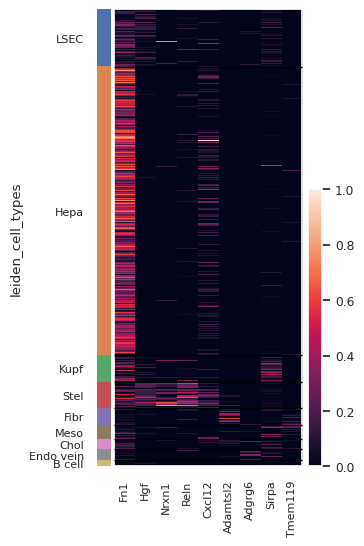

In [ ]:
sc.pl.heatmap(sdata.table,var_names=interesting_genes_drop,groupby='leiden_cell_types',standard_scale='var')

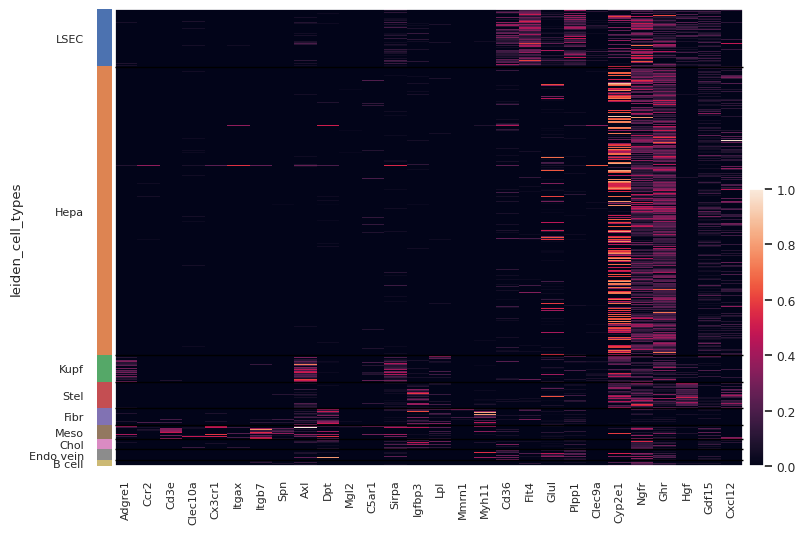

In [ ]:
sc.pl.heatmap(sdata.table,var_names=interesting_genes_add,groupby='leiden_cell_types',standard_scale='var')

In [ ]:
adata_sub = sdata.table[~(sdata.table.obs['leiden_cell_types']=='Hepa'),:]


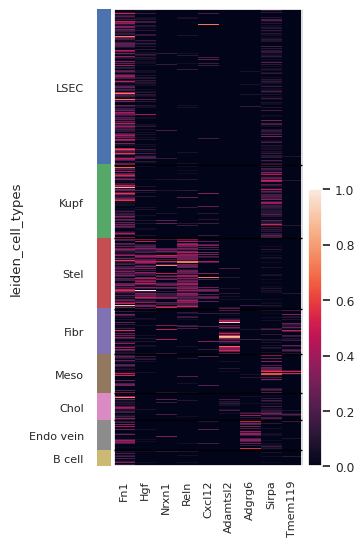

In [ ]:
sc.pl.heatmap(adata_sub,var_names=interesting_genes_drop,groupby='leiden_cell_types',standard_scale='var')

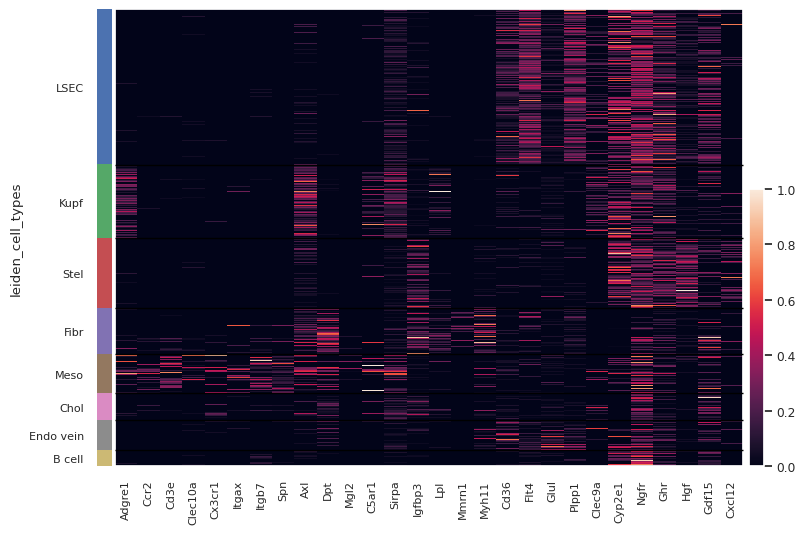

In [ ]:
sc.pl.heatmap(adata_sub,var_names=interesting_genes_add,groupby='leiden_cell_types',standard_scale='var')